<a href="https://colab.research.google.com/github/tienhoang87/mini-project-EDA/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_EDA%2BExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Cleaning

### Data Reading & Data Types

In [4]:
#Read the data in pandas
path1=r'/content/drive/MyDrive/bản copy media mới/Bản sao của Attribute+DataSet.csv'
df1= pd.read_csv(path1)
path2=r'/content/drive/MyDrive/bản copy media mới/Bản sao của Dress+Sales.csv'
sale=pd.read_csv(path2)
#inp1= pd.read_csv(" ")

You have “Attribute DataSet” which contains a column named “Price”.

In [6]:
# Print the information about the attributes of inp0 and inp1.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB


In [5]:
df1.Recommendation.unique()

array([1, 0])

In [7]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

### Fixing the Rows and Columns

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.




In [8]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
df1.Size.unique()

array(['M', 'L', 'XL', 'free', 'S', 'small', 's'], dtype=object)

In [9]:
# Print the value counts of each category in "Size" column.
df1.loc[df1['Size'].isin(['M']),'Size']='Medium'
df1.loc[df1['Size'].isin(['L']),'Size']='Large'
df1.loc[df1['Size'].isin(['XL']),'Size']='Extra large'
df1.loc[df1['Size'].isin(['free']),'Size']='Free'
df1.loc[df1['Size'].isin(['s','S','small']),'Size']='Small'

In [10]:
df1

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,990559192,Brief,Average,4.7,Medium,winter,o-neck,halfsleeve,acrylic,chiffon,NaN,striped,0
475,713391965,Casual,Low,4.7,Medium,Spring,o-neck,full,polyster,NaN,NaN,solid,1
476,532874347,Casual,Average,4.7,Medium,Summer,v-neck,full,cotton,NaN,lace,solid,1
477,655464934,Casual,Average,4.6,Large,winter,boat-neck,sleevless,silk,broadcloth,applique,print,1


### Impute/Remove Missing values

In [11]:
# Print the null count of each variables of inp0 and inp1.
df1.isnull().sum()/len(df1)*100

Dress_ID           0.000000
Style              0.000000
Price              0.417537
Rating             0.000000
Size               0.000000
Season             0.417537
NeckLine           0.626305
SleeveLength       0.417537
Material          24.843424
FabricType        53.444676
Decoration        46.764092
Pattern Type      21.294363
Recommendation     0.000000
dtype: float64

In [12]:
sale.isnull().sum()/len(sale)*100

Dress_ID       0.000000
29-08-2013     0.000000
31-08-2013     0.000000
09-02-2013     0.000000
09-04-2013     0.000000
09-06-2013     0.000000
09-08-2013     0.000000
09-10-2013     0.000000
09-12-2013     0.000000
14-09-2013     0.000000
16-09-2013     0.000000
18-09-2013     0.000000
20-09-2013     0.000000
22-09-2013     0.000000
24-09-2013     0.000000
26-09-2013    46.346555
28-09-2013     0.000000
30-09-2013    53.653445
10-02-2013    54.070981
10-04-2013    53.862213
10-06-2013     0.000000
10-08-2013    53.235908
10-10-2013    53.235908
10-12-2013     0.000000
dtype: float64

In [13]:
df1.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [14]:
# Print the data types information of inp1 i.e. "Dress Sales" data. In thông tin loại dữ liệu của inp1 tức là dữ liệu "Bán quần áo".
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB


In [16]:
sale['09-12-2013'].dtype=='object'



True

In [17]:
col_irr=[]
for i in sale.columns:
  if sale[i].dtype=='object':
    col_irr.append(i)
col_irr

['09-12-2013',
 '14-09-2013',
 '16-09-2013',
 '18-09-2013',
 '20-09-2013',
 '22-09-2013']

In [18]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
pd.to_numeric(sale['09-12-2013'])

ValueError: Unable to parse string "Removed" at position 263

In [19]:
sale['09-12-2013'].unique()

array(['3119', '1558', '10', '1723', '1638', '18', '251', '117', '17',
       '13', '65', '90', '1906', '2934', '49', '45', '1898', '12', '381',
       '227', '1248', '233', '1671', '5', '22', '1762', '105', '497',
       '7156', '1456', '279', '1004', '1244', '2321', '1706', '1744',
       '66', '569', '557', '156', '2930', '640', '878', '240', '112',
       '5475', '24', '1210', '4', '209', '218', '59', '1474', '921',
       '328', '567', '585', '359', '30', '8', '68', '2025', '293', '670',
       '375', '25', '415', '83', '369', '40', '826', '2366', '6', '73',
       '137', '1412', '393', '382', '14', '232', '401', '325', '308',
       '722', '16', '119', '174', '2', '0', '302', '808', '407', '237',
       '649', '1311', '348', '1966', '531', '81', '3544', '164', '1335',
       '72', '414', '134', '452', '221', '450', '1029', '1235', '7', '91',
       '665', '307', '169', '442', '217', '3', '264', '578', '194', '339',
       '165', '64', '132', '635', '113', '43', '1271', '460', '45

In [20]:
sale['09-12-2013'].str.isnumeric()

0      True
1      True
2      True
3      True
4      True
       ... 
474    True
475    True
476    True
477    True
478    True
Name: 09-12-2013, Length: 479, dtype: bool

In [21]:
sale[sale['09-12-2013'].str.isnumeric()==False]['09-12-2013']

263    Removed
Name: 09-12-2013, dtype: object

In [22]:
sale[sale['09-12-2013'].str.isnumeric()==False]['09-12-2013'].value_counts()

09-12-2013
Removed    1
Name: count, dtype: int64

In [23]:
len(sale[sale['09-12-2013'].str.isnumeric()==False]['09-12-2013'])

1

In [24]:
col_irr

['09-12-2013',
 '14-09-2013',
 '16-09-2013',
 '18-09-2013',
 '20-09-2013',
 '22-09-2013']

In [25]:
for i in col_irr:
  print(sale[sale[i].str.isnumeric()==False][i].value_counts())

09-12-2013
Removed    1
Name: count, dtype: int64
14-09-2013
removed    1
Name: count, dtype: int64
16-09-2013
removed    1
Name: count, dtype: int64
18-09-2013
removed    1
Name: count, dtype: int64
20-09-2013
removed    1
Name: count, dtype: int64
22-09-2013
Orders    1
Name: count, dtype: int64


In [26]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
for i in col_irr:
  sale=sale[sale[i].str.isnumeric()==True]

In [27]:
# Convert the object type columns in "Dress Sales" into float type of data type.
sale['09-12-2013']=pd.to_numeric(sale['09-12-2013'])

In [28]:
for i in col_irr:
  sale[i]=pd.to_numeric(sale[i])

In [29]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    477 non-null    float64
 1   29-08-2013  477 non-null    int64  
 2   31-08-2013  477 non-null    int64  
 3   09-02-2013  477 non-null    int64  
 4   09-04-2013  477 non-null    int64  
 5   09-06-2013  477 non-null    int64  
 6   09-08-2013  477 non-null    int64  
 7   09-10-2013  477 non-null    int64  
 8   09-12-2013  477 non-null    int64  
 9   14-09-2013  477 non-null    int64  
 10  16-09-2013  477 non-null    int64  
 11  18-09-2013  477 non-null    int64  
 12  20-09-2013  477 non-null    int64  
 13  22-09-2013  477 non-null    int64  
 14  24-09-2013  477 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  477 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    float6

In [30]:
# Print the null percetange of each column of inp1.
sale.isnull().sum()/len(sale)*100

Dress_ID       0.000000
29-08-2013     0.000000
31-08-2013     0.000000
09-02-2013     0.000000
09-04-2013     0.000000
09-06-2013     0.000000
09-08-2013     0.000000
09-10-2013     0.000000
09-12-2013     0.000000
14-09-2013     0.000000
16-09-2013     0.000000
18-09-2013     0.000000
20-09-2013     0.000000
22-09-2013     0.000000
24-09-2013     0.000000
26-09-2013    46.121593
28-09-2013     0.000000
30-09-2013    53.459119
10-02-2013    53.878407
10-04-2013    53.668763
10-06-2013     0.000000
10-08-2013    53.039832
10-10-2013    53.039832
10-12-2013     0.000000
dtype: float64

In [31]:
len(sale)

477

In [32]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
null_40=[]
for i in sale.columns:
  if sale[i].isnull().sum()/len(sale) >0.4:
    null_40.append(i)
null_40

['26-09-2013',
 '30-09-2013',
 '10-02-2013',
 '10-04-2013',
 '10-08-2013',
 '10-10-2013']

In [33]:
sale.drop(columns=null_40,inplace=True)

In [34]:
sale.isnull().sum()

Dress_ID      0
29-08-2013    0
31-08-2013    0
09-02-2013    0
09-04-2013    0
09-06-2013    0
09-08-2013    0
09-10-2013    0
09-12-2013    0
14-09-2013    0
16-09-2013    0
18-09-2013    0
20-09-2013    0
22-09-2013    0
24-09-2013    0
28-09-2013    0
10-06-2013    0
10-12-2013    0
dtype: int64

categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [35]:
# Create the four seasons columns in inp1, according to the above criteria.
for i in ['summer','autumn','winter','spring']:
  sale[i]=0
sale

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,summer,autumn,winter,spring
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3386,3479,3554,3706,3897,4048,0,0,0,0
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2106,2454,2710,3258,3911,4277,0,0,0,0
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,10,11,11,11,11,11,0,0,0,0
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1812,1845,1878,1914,1952,1963,0,0,0,0
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,1824,1919,2032,2252,2544,2736,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,9.905592e+08,0,0,0,60,62,64,65,67,68,...,72,73,73,75,77,77,0,0,0,0
475,7.133920e+08,0,0,0,560,554,544,537,525,519,...,492,480,400,360,380,285,0,0,0,0
476,5.328743e+08,0,0,0,734,728,726,715,694,690,...,665,658,616,586,551,520,0,0,0,0
477,6.554649e+08,0,0,0,254,259,261,263,268,270,...,264,264,257,255,249,248,0,0,0,0


In [36]:
'29-08-2013'[3:5]

'08'

In [37]:
type('29-08-2013'[3:5])

str

In [38]:
int('29-08-2013'[3:5])

8

In [39]:
for i in sale.columns[1:-4]:
  if int(i[3:5]) in [6,7,8]:sale['summer']=sale['summer']+sale[i]
  elif int(i[3:5]) in [9,10,11]:sale['autumn']=sale['autumn']+sale[i]
  elif int(i[3:5]) in [12,1,2]:sale['winter']=sale['winter']+sale[i]
  elif int(i[3:5]) in [3,4,5]:sale['spring']=sale['spring']+sale[i]


In [40]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
sale

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,summer,autumn,winter,spring
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3386,3479,3554,3706,3897,4048,13899,26857,9658,2660
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2106,2454,2710,3258,3911,4277,6216,17311,6405,750
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,10,11,11,11,11,11,40,82,28,7
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1812,1845,1878,1914,1952,1963,7213,14411,5012,1455
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,1824,1919,2032,2252,2544,2736,7706,14676,5678,1396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,9.905592e+08,0,0,0,60,62,64,65,67,68,...,72,73,73,75,77,77,203,565,144,60
475,7.133920e+08,0,0,0,560,554,544,537,525,519,...,492,480,400,360,380,285,1478,3800,810,560
476,5.328743e+08,0,0,0,734,728,726,715,694,690,...,665,658,616,586,551,520,2005,5290,1214,734
477,6.554649e+08,0,0,0,254,259,261,263,268,270,...,264,264,257,255,249,248,769,2117,516,254


Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [41]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
df = pd.merge(left=df1,right=sale, how='left', left_on='Dress_ID', right_on='Dress_ID')
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,summer,autumn,winter,spring
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554.0,3706.0,3897.0,4048.0,13899.0,26857.0,9658.0,2660.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710.0,3258.0,3911.0,4277.0,6216.0,17311.0,6405.0,750.0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11.0,11.0,11.0,11.0,40.0,82.0,28.0,7.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878.0,1914.0,1952.0,1963.0,7213.0,14411.0,5012.0,1455.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032.0,2252.0,2544.0,2736.0,7706.0,14676.0,5678.0,1396.0


In [42]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
df.drop(df.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)
df.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
summer              2
autumn              2
winter              2
spring              2
dtype: int64

Print the null count of inp0 to get the idea about the missing values in data set.

In [43]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
 13  summer          477 non-null    float64
 14  autumn          477 non-null    float64
 15  winter          477 non-null    float64
 16  spring          477 non-null    float64
dtypes: float64(5), int64(2), object(10)

In [44]:
df.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
summer              2
autumn              2
winter              2
spring              2
dtype: int64

In [45]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
for i in ['Price','Season', 'NeckLine','SleeveLength','winter','autumn','summer','spring']:
  df[i] = df[i].fillna(df[i].mode()[0])


In [46]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
for i in ['Material','FabricType','Decoration','Pattern Type']:
  df[i] = df[i].fillna(df[i].mode()[0])


### Standardise value


In [47]:
#correcting the spellings.
df.Season.unique()

array(['Summer', 'Automn', 'Spring', 'Winter', 'spring', 'winter',
       'Autumn'], dtype=object)

In [48]:
df.loc[df['Season'].isin(['Automn']),'Season']='Autumn'
df.loc[df['Season'].isin(['spring']),'Season']='Spring'
df.loc[df['Season'].isin(['winter']),'Season']='Winter'


In [49]:
df.NeckLine.unique()

array(['o-neck', 'v-neck', 'boat-neck', 'peterpan-collor', 'ruffled',
       'turndowncollor', 'slash-neck', 'mandarin-collor', 'open',
       'sqare-collor', 'Sweetheart', 'sweetheart', 'Scoop', 'halter',
       'backless', 'bowneck'], dtype=object)

nên đưa về hết chữ Hoa hoặc chữ thường

In [50]:
df.loc[df['NeckLine'].isin(['Sweetheart']),'NeckLine']='sweetheart'
df.loc[df['NeckLine'].isin(['Scoop']),'NeckLine']='scoop'

In [51]:
df.Price.unique()

array(['Low', 'High', 'Average', 'Medium', 'very-high'], dtype=object)

In [52]:
df.loc[df['Price'].isin(['very-high']),'Price']='Very-High'

In [53]:
df.Material.unique()

array(['cotton', 'microfiber', 'polyster', 'silk', 'chiffonfabric',
       'nylon', 'other', 'milksilk', 'linen', 'rayon', 'lycra', 'mix',
       'acrylic', 'spandex', 'lace', 'modal', 'cashmere', 'viscos',
       'sill', 'wool', 'model', 'shiffon'], dtype=object)

In [54]:
df.FabricType.unique()

array(['chiffon', 'broadcloth', 'jersey', 'other', 'batik', 'satin',
       'flannael', 'worsted', 'woolen', 'poplin', 'dobby', 'knitting',
       'flannel', 'tulle', 'sattin', 'organza', 'lace', 'Corduroy',
       'wollen', 'knitted', 'shiffon', 'terry'], dtype=object)

In [55]:
df. Decoration.unique()

array(['ruffles', 'lace', 'embroidary', 'bow', 'beading', 'sashes',
       'hollowout', 'pockets', 'sequined', 'applique', 'button', 'Tiered',
       'rivet', 'feathers', 'flowers', 'pearls', 'pleat', 'crystal',
       'ruched', 'draped', 'tassel', 'plain', 'cascading', 'none'],
      dtype=object)

In [56]:
df.SleeveLength.unique()

array(['sleevless', 'Petal', 'full', 'butterfly', 'short', 'threequarter',
       'halfsleeve', 'cap-sleeves', 'turndowncollor', 'threequater',
       'capsleeves', 'sleeveless', 'sleeevless', 'half', 'urndowncollor',
       'thressqatar', 'sleveless'], dtype=object)

## Univariate Analysis
Phân tích đơn biến

### Categorical Unordered Univariate Analysis


In [64]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
df['all_seasons']=df['summer']+df['spring']+df['winter']+df['autumn']

In [65]:
style_sum=df.groupby('Style').sum()['all_seasons']
others_list=style_sum[style_sum<50000].index.tolist()

In [66]:
others_list

['Other']

In [67]:
for i in others_list:
  df.loc[df['Style']==i,'Style']='Other'

In [68]:
others_list


['Other']

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [69]:
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,summer,autumn,winter,spring,all_seasons
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,cotton,chiffon,ruffles,animal,1,13899.0,26857.0,9658.0,2660.0,53074.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,chiffon,ruffles,animal,0,6216.0,17311.0,6405.0,750.0,30682.0
2,1190380701,vintage,High,0.0,Large,Autumn,o-neck,full,polyster,chiffon,lace,print,0,40.0,82.0,28.0,7.0,157.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1,7213.0,14411.0,5012.0,1455.0,28091.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706.0,14676.0,5678.0,1396.0,29456.0


In [70]:
# Calculate the percentage of each categories in the "Style" variable.
style_count=df.groupby('Style').count()['Dress_ID']
style_count.loc['cute']/style_count.sum()

0.0918580375782881

In [71]:
style_count.loc['Other']/style_count.sum()

0.020876826722338204

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [72]:
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,summer,autumn,winter,spring,all_seasons
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,cotton,chiffon,ruffles,animal,1,13899.0,26857.0,9658.0,2660.0,53074.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,chiffon,ruffles,animal,0,6216.0,17311.0,6405.0,750.0,30682.0
2,1190380701,vintage,High,0.0,Large,Autumn,o-neck,full,polyster,chiffon,lace,print,0,40.0,82.0,28.0,7.0,157.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1,7213.0,14411.0,5012.0,1455.0,28091.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706.0,14676.0,5678.0,1396.0,29456.0


In [70]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.
table=df.groupby('NeckLine').sum()['all_seasons']
others_list=table[table<50000].index.tolist()

In [117]:
df.loc[df['NeckLine'].isin(others_list),'NeckLine']='Other'

In [118]:
df.NeckLine.unique()

array(['o-neck', 'v-neck', 'boat-neck', 'Other', 'ruffled',
       'turndowncollor', 'slash-neck'], dtype=object)

In [ ]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.


In [73]:
def func(x,y):
  table=df.groupby(x).sum()['all_seasons']
  other_list=table[table<y].index.tolist()
  for i in other_list:
    df.loc[df[x]==i,x]='Other'

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [74]:
func("SleeveLength",50000)
df.SleeveLength.unique()

array(['sleevless', 'Other', 'full', 'short', 'threequarter',
       'halfsleeve'], dtype=object)

In [75]:
func("NeckLine",50000)

In [76]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
func("Material",25000)
df.groupby("Material").sum()['all_seasons']

Material
Other             101502.0
chiffonfabric     333284.0
cotton           1407834.0
microfiber         31817.0
milksilk           33710.0
mix                68490.0
nylon              29483.0
polyster          487893.0
rayon              65208.0
silk               93867.0
Name: all_seasons, dtype: float64

In [77]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
func("FabricType",25000)
df.groupby("FabricType").sum()['all_seasons']

FabricType
Other           71247.0
broadcloth     119998.0
chiffon       2234312.0
jersey         119952.0
shiffon         27486.0
worsted         80093.0
Name: all_seasons, dtype: float64

In [78]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
func("Pattern Type",25000)
df.groupby("Pattern Type").sum()['all_seasons']

Pattern Type
Other          29841.0
animal        211273.0
dot           245091.0
geometric     114335.0
leopard        25267.0
patchwork     190498.0
print         403025.0
solid        1371813.0
striped        61945.0
Name: all_seasons, dtype: float64

In [79]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.
func("Decoration",25000)
df.groupby("Decoration").sum()['all_seasons']

Decoration
Other          121038.0
applique        67873.0
beading         48925.0
bow            255359.0
embroidary      45760.0
hollowout       67758.0
lace          1520730.0
ruffles        191187.0
sashes         285759.0
sequined        48699.0
Name: all_seasons, dtype: float64

### Caregorical Ordered Univariate Analysis

### Numerical variable Univariate analysis:

In [80]:
# Describe the numerical variale: "Autumn".
df.describe().loc['max','autumn']-df.describe().loc['75%','autumn']

52430.0

<Axes: >

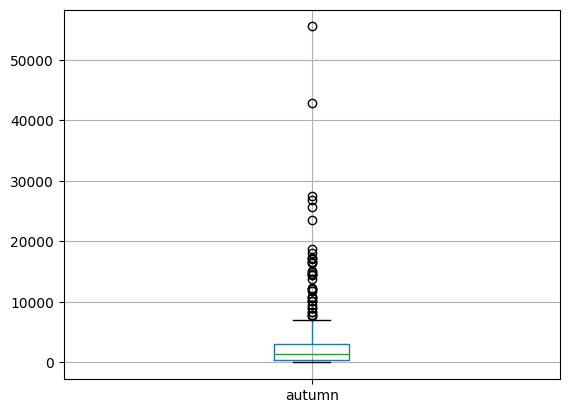

In [81]:
# plot the boxplot of "Autumn" column.
df.boxplot(column='autumn')

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


In [82]:
# Find the maximum and 99th percentile of Winter season.
df.winter.max()-df.winter.quantile(0.99)

11479.580000000029

In [83]:
# Find the maximum and 99th percentile of Summer season.
df.summer.max()-df.summer.quantile(0.99)

21623.000000000007

In [84]:
# Find the maximum and 99th percentile of Spring season.
df.spring.max()-df.spring.quantile(0.99)

4717.12

In [85]:
# Find the maximum and 99th percentile of Autumn season.
df.autumn.max()-df.autumn.quantile(0.99)

31571.600000000064

## Bivariate Analysis

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


In [86]:
# Find the Mean of Ratings for each Price category.
df.groupby('Price')['Rating'].mean().sort_values().head(1)

Price
High    2.914286
Name: Rating, dtype: float64

What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [87]:
# Find the median of Ratings for each Style category.
df.groupby('Style')['Rating'].median().loc['vintage']

4.6

Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


In [88]:
df[df['Recommendation']==1]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,summer,autumn,winter,spring,all_seasons
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,cotton,chiffon,ruffles,animal,1,13899.0,26857.0,9658.0,2660.0,53074.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1,7213.0,14411.0,5012.0,1455.0,28091.0
7,1113094204,Other,Average,0.0,Free,Spring,v-neck,short,cotton,broadcloth,beading,solid,1,68.0,181.0,60.0,12.0,321.0
8,985292672,bohemian,Low,0.0,Free,Summer,v-neck,sleevless,nylon,chiffon,lace,solid,1,58.0,107.0,39.0,12.0,216.0
11,957723897,sexy,Low,4.7,Medium,Winter,o-neck,threequarter,cotton,chiffon,lace,print,1,8640.0,17340.0,6356.0,1568.0,33904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,964917582,Casual,Average,5.0,Large,Summer,o-neck,sleevless,cotton,chiffon,lace,solid,1,150.0,458.0,150.0,23.0,781.0
473,817353671,bohemian,Low,4.6,Free,Summer,o-neck,sleevless,cotton,chiffon,Other,solid,1,737.0,2059.0,538.0,217.0,3551.0
475,713391965,Casual,Low,4.7,Medium,Spring,o-neck,full,polyster,chiffon,lace,solid,1,1478.0,3800.0,810.0,560.0,6648.0
476,532874347,Casual,Average,4.7,Medium,Summer,v-neck,full,cotton,chiffon,lace,solid,1,2005.0,5290.0,1214.0,734.0,9243.0


In [89]:
# Summer sale vs Recommendation.
df[df['Recommendation']==1]['summer'].mean()

1435.1512195121952

In [90]:
# Spring sale vs Recommendation.
df[df['Recommendation']==1]['spring'].mean()

297.22926829268295

In [91]:
# Autumn sale vs Recommendation.
df[df['Recommendation']==1]['autumn'].mean()

2806.5658536585365

In [92]:
# Winter sale vs Recommendation.
df[df['Recommendation']==1]['winter'].mean()

979.4780487804878

### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [94]:
# Size vs Recommendation.
pd.pivot_table(df,index=['Size'],columns='Recommendation',values=['Dress_ID'],aggfunc='count')['Dress_ID'][1].sort_values()

Size
Extra large     4
Small          13
Large          36
Free           76
Medium         76
Name: 1, dtype: int64

### Multivariate analysis

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


In [95]:
# plot the heat map of Style, price and Recommendation.
df.groupby(["Style","Price"])["Recommendation"].mean().sort_values(ascending=False)

Style     Price    
cute      Medium       1.000000
bohemian  Very-High    1.000000
          Medium       1.000000
party     Very-High    0.823529
          Medium       0.800000
sexy      Low          0.750000
party     Average      0.700000
Casual    High         0.666667
cute      High         0.666667
Casual    Medium       0.666667
bohemian  Low          0.666667
Sexy      Low          0.515152
vintage   Medium       0.500000
sexy      Average      0.500000
Other     Medium       0.500000
Casual    Very-High    0.500000
cute      Low          0.500000
Casual    Low          0.382022
cute      Average      0.380952
Other     Average      0.375000
vintage   Average      0.352941
Casual    Average      0.345455
Sexy      Average      0.344828
Brief     Average      0.333333
party     High         0.333333
bohemian  Average      0.333333
vintage   Low          0.250000
work      Average      0.214286
Brief     Low          0.000000
Sexy      Very-High    0.000000
sexy      Medium    

Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


In [96]:
# plot the heat map of Season, material and Recommendation.
table=df.groupby(["Material","Season"])["Recommendation"].mean().sort_values().reset_index()
table[(table.Recommendation == 0)&(table.Season.isin(["Summer","Winter"]))]

,Material,Season,Recommendation
3,silk,Summer,0.0
4,milksilk,Summer,0.0
5,microfiber,Winter,0.0
6,microfiber,Summer,0.0
7,milksilk,Winter,0.0
8,chiffonfabric,Winter,0.0
